# Model Selection

In [77]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from os import chdir
chdir('/home/jovyan/work/curriculum')
import mglearn 


from IPython.display import display

%matplotlib inline 
pd.options.display.precision = 4
mpl.rcParams['font.family'] = 'Lato'
mpl.rcParams['font.weight'] = 700
sns.set(font='Lato', font_scale=1)
sns.set()
np.random.seed(42)

# Model Selection

Next, you will build a series of models. 

## Option 1:

Pull in your deskewed pickle from notebook 1

Two for Benchmarking:
1. a KNN Model
1. a Tree-like Model

Two for Prediction:
1. a scaled Grid-Searched KNN
1. a scaled Tree-like Model

## Option 2:

Get a dataframe that has not yet been deskewed.

Two for Benchmarking:
1. a KNN Model
1. a Tree-like Model
1. (optional) use a Dummy Regressor

Four for Prediction:
1. a deskewed, scaled Grid-Searched KNN
1. a deskewed, scaled Tree-like Model
1. a scaled Grid-Searched KNN
1. a scaled Tree-like Model

Calculate Mean Test Scores on each the benchmarking and prediction models and present an analysis on these models. 

### Read in your pickled dataframes from Notebook 1

In [2]:
import pickle

In [3]:
house_prices_features = pd.read_pickle('pickled_feature_df')
house_prices_target = pd.read_pickle('pickled_target_df')

### One-Hot Encode Categorical Variables

In [4]:
house_prices_features.head(2)

,alley,bedroomabvgr,bldgtype,bsmtcond,bsmtexposure,bsmtfinsf1,bsmtfinsf2,bsmtfintype1,bsmtfintype2,bsmtfullbath,...,totalbsmtsf,totrmsabvgrd,utilities,wooddecksf,yearbuilt,yearremodadd,yrsold,garagearea,lotfrontage,masvnrarea
id,,,,,,,,,,,,,,,,,,,,,
1,Grvl,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1,...,856.0,8,AllPub,0.0,2003.0,2003.0,2008,548.0,65.0,196.0
4,Grvl,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1,...,756.0,7,AllPub,0.0,1915.0,1970.0,2006,642.0,60.0,0.0


In [5]:
house_prices_features.columns

Index(['alley', 'bedroomabvgr', 'bldgtype', 'bsmtcond', 'bsmtexposure',
       'bsmtfinsf1', 'bsmtfinsf2', 'bsmtfintype1', 'bsmtfintype2',
       'bsmtfullbath', 'bsmthalfbath', 'bsmtqual', 'bsmtunfsf', 'centralair',
       'condition1', 'condition2', 'electrical', 'enclosedporch', 'extercond',
       'exterior1st', 'exterior2nd', 'exterqual', 'fence', 'fireplacequ',
       'fireplaces', 'firstflrsf', 'foundation', 'fullbath', 'functional',
       'garagecars', 'garagecond', 'garagefinish', 'garagequal', 'garagetype',
       'garageyrblt', 'grlivarea', 'halfbath', 'heating', 'heatingqc',
       'housestyle', 'kitchenabvgr', 'kitchenqual', 'landcontour', 'landslope',
       'lotarea', 'lotconfig', 'lotshape', 'lowqualfinsf', 'masvnrtype',
       'miscfeature', 'miscval', 'mosold', 'mssubclass', 'mszoning',
       'neighborhood', 'openporchsf', 'overallcond', 'overallqual',
       'paveddrive', 'poolarea', 'poolqc', 'roofmatl', 'roofstyle',
       'salecondition', 'saletype', 'screenporc

In [6]:
house_prices_cat = house_prices_features.drop(['garagearea','masvnrarea','lotfrontage'], 
                                              axis=1)

In [7]:
house_prices_dummies = pd.get_dummies(house_prices_cat)
house_prices_dummies.head(2)

,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,enclosedporch,firstflrsf,garageyrblt,grlivarea,lotarea,lowqualfinsf,miscval,...,totrmsabvgrd_10,totrmsabvgrd_11,totrmsabvgrd_12,utilities_AllPub,utilities_NoSeWa,yrsold_2006,yrsold_2007,yrsold_2008,yrsold_2009,yrsold_2010
id,,,,,,,,,,,,,,,,,,,,,
1,706.0,0.0,150.0,0.0,856.0,2003.0,1710.0,8450.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
4,216.0,0.0,540.0,272.0,961.0,1998.0,1717.0,9550.0,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0


# Model Selection

Next, you will build a series of models. 

## Option 1:

Pull in your deskewed pickle from notebook 1

Two for Benchmarking:
1. a KNN Model
1. a Tree-like Model

Two for Prediction:
1. a scaled Grid-Searched KNN
1. a scaled Tree-like Model


# 2
Two for Benchmarking:
1. a scaled KNN Model
1. a scaled Tree-like Model

Four for Prediction:
1. a scaled, Grid-Searched KNN
1. a scaled, Grid-Searched Tree-like Model
1. a deskewed, scaled Grid-Searched KNN
1. a deskewed, scaled Tree-like Model

Calculate Mean Test Scores on each the benchmarking and prediction models and present an analysis on these models. 

<div style="float: left">
<img src="http://interactive.blockdiag.com/image?compression=deflate&encoding=base64&src=eJxLyslPzk7JTExXqOZSUChOTsxJVdC1U1D39vNTUDa0UojJCwaJpQAZAc6O6taYioxAihTgqtyLMlN0g1MTi5IzgHygCjQ9IUWpqbo5mdmpCsrG-HSC1AG11gIABDUwYQ" width=380px style="float: left"><img src="http://interactive.blockdiag.com/image?compression=deflate&encoding=base64&src=eJxLyslPzk7JTExXqOZSUEhJLc5OLVfQtVMoTk7MSbUGCoEZIBF1bz8_BWUTK4WYPBewstQUhWCQZApQJMDZUR2LalMU1Qjl7kWZKbrBqYlFyRlAPlApmuaQotRU3ZzM7FQFZTOijABpAJpRCwCkXUAJ" width=500px style="float: left">
</div>

Use this template:

        gs_params = {}
        model_1 = GridSearchCV(ModelClass(), cv=5,
                               param_grid=gs_params)
        model_1.fit(X_set, y_train)
        display(pd.DataFrame(model_1.cv_results_))
        print(model_1.cv_results_['mean_test_score'])

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit

In [9]:
scaler = StandardScaler()

In [10]:
shuffle_split = ShuffleSplit(test_size=.3, train_size=.7, n_splits=10)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(house_prices_dummies, house_prices_target,
                                                    test_size=.3, train_size=.7,
                                                   random_state=42,
                                                    )

In [12]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
knr = KNeighborsRegressor()

In [15]:
knnbenchmark = knr.fit(X_train, y_train)
print("Train set score: {:.2f}".format(knnbenchmark.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knnbenchmark.score(X_test, y_test)))

Train set score: 0.77
Test set score: 0.60


In [16]:
treebenchmark = DecisionTreeRegressor().fit(X_train, y_train)
print("Train set score: {:.2f}".format(treebenchmark.score(X_train, y_train)))
print("Test set score: {:.2f}".format(treebenchmark.score(X_test, y_test)))

Train set score: 1.00
Test set score: 0.77


In [17]:
from sklearn.ensemble import ExtraTreesClassifier

In [102]:
etparams = {
    'bootstrap':[True],
    'n_estimators':[11,23,31,41,51,61,47]
}

In [103]:
et_gs = GridSearchCV(ExtraTreesClassifier(), param_grid=etparams, cv=shuffle_split, n_jobs=-1)

In [104]:
et_gs.fit(X_train, y_train)
print("Train set score: {:.2f}".format(et_gs.score(X_test, y_test)))
print("Test set score: {:.2f}".format(et_gs.score(X_test, y_test)))

Train set score: 0.02
Test set score: 0.02


In [35]:
knparams = {
    'n_neighbors':[1,3,5,7]
}

In [36]:
knr_gs = GridSearchCV(KNeighborsRegressor(), param_grid=knparams, cv=shuffle_split)

In [37]:
knr_gs.fit(X_train, y_train)
print("Train set score: {:.2f}".format(knr_gs.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knr_gs.score(X_test, y_test)))

Train set score: 0.77
Test set score: 0.60


## Model Complexity Evaluation

1. Train a grid searched Decision Tree using a range of `max_depth`. 
1. Obtain the `cv_results_` from the `GridSearchCV` object.
1. Prepare a plot of `mean_train_score` against `max_depth` and `mean_test_score` against `max_depth` on the same plot. 

In [69]:
dtrparams = {
    'criterion' : ['mse'], 
    'max_depth' : [None], 
    'max_features' : [None],
    'max_leaf_nodes' : [None], 
    'min_impurity_split' : [1e-07],
    'min_samples_leaf' : [1], 
    'min_samples_split' : [2],
    'min_weight_fraction_leaf' : [0.0], 
    'presort' : [False], 
    'random_state' : [None],
    'splitter' : ['best']
}

In [70]:
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid=dtrparams, cv=shuffle_split)

In [71]:
dtr_gs.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.3, train_size=0.7),
       error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_impurity_split': [1e-07], 'random_state': [None], 'criterion': ['mse'], 'max_features': [None], 'min_samples_split': [2], 'min_samples_leaf': [1], 'presort': [False], 'splitter': ['best'], 'max_leaf_nodes': [None], 'max_depth': [None], 'min_weight_fraction_leaf': [0.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [72]:
print("Best parameters: {}".format(dtr_gs.best_params_))
print("Best cross-validation score: {:.2f}".format(dtr_gs.best_score_))
print("Best estimator:{}".format(dtr_gs.best_estimator_))

Best parameters: {'min_impurity_split': 1e-07, 'random_state': None, 'criterion': 'mse', 'max_features': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'presort': False, 'splitter': 'best', 'max_leaf_nodes': None, 'max_depth': None, 'min_weight_fraction_leaf': 0.0}
Best cross-validation score: 0.62
Best estimator:DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


In [85]:
results = pd.DataFrame(dtr_gs.cv_results_)

In [87]:
results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_impurity_split,param_min_samples_leaf,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0226,0.0013,0.6166,1.0,mse,None,None,None,1e-07,1,...,0.6177,1.0,0.6814,1.0,0.6758,1.0,0.0034,0.001,0.0798,0.0


[]

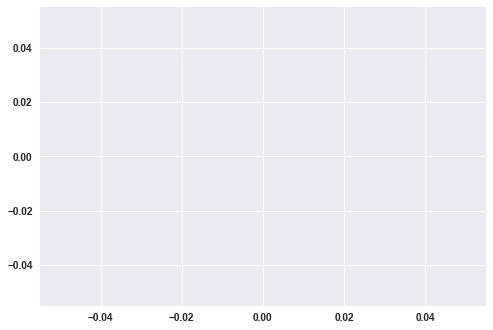

In [98]:
scores = np.array(results.mean_train_score).reshape(1, 1)

plt.plot(xlabel='mean_test_score', xticklabels=results['mean_test_score'],
                      ylabel='mean_train_score', yticklabels=results['mean_train_score'], 
                      cmap="viridis")

### Analysis

Considering this model complexity plot, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?

### Training and Testing Errors:
As the max depth increases, the mean error for both training and testing sets seem to increase. 

What is the grid search algorithm and when is it applicable? What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?

The grid search algorithm searches across multiple folds of data, and searches for the best paramters for a chosen model. Cross validation is leaving a piece of data out, and having a model iterate over the rest of the data, then iterating over the held out data. Cross validation is helpful when using a grid search, because without it, our model might fail to predict anything on unseen data. 

### Prediction

Choose a model you have developed in this workbook that you believe will best generalize. Provide a statement here as to why you think it will generalize best. Pickle the model and upload to github along with this notebook.

I thought initially that throwing a less oft-used model like Extra Trees at the data would yield that best prediction. However, KNeighbors with no parameter tuning received the highest score here.

In [111]:
knr_gs_pickled = pd.DataFrame(knr_gs).to_pickle("knr_gs")

PandasError: DataFrame constructor not properly called!